In [1]:
import shutil, random, os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import pywt
import math

In [2]:
widths = np.arange(1,101)

In [3]:
dirpath='/home/sultan/EEG/CP/CP_Extracted_CSV_Source_Dk_data/'

/home/sultan/EEG/CP/CP_Extracted_CSV_Source_Dk_data/S1/Trig_1/
/home/sultan/EEG/CP/CP_Extracted_CSV_Source_Dk_data/S1/Trig_5/
/home/sultan/EEG/CP/CP_Extracted_CSV_Source_Dk_data/S2/Trig_1/
/home/sultan/EEG/CP/CP_Extracted_CSV_Source_Dk_data/S2/Trig_5/
/home/sultan/EEG/CP/CP_Extracted_CSV_Source_Dk_data/S3/Trig_1/
/home/sultan/EEG/CP/CP_Extracted_CSV_Source_Dk_data/S3/Trig_5/
/home/sultan/EEG/CP/CP_Extracted_CSV_Source_Dk_data/S4/Trig_1/
/home/sultan/EEG/CP/CP_Extracted_CSV_Source_Dk_data/S4/Trig_5/
/home/sultan/EEG/CP/CP_Extracted_CSV_Source_Dk_data/S5/Trig_1/
/home/sultan/EEG/CP/CP_Extracted_CSV_Source_Dk_data/S5/Trig_5/
/home/sultan/EEG/CP/CP_Extracted_CSV_Source_Dk_data/S6/Trig_1/
/home/sultan/EEG/CP/CP_Extracted_CSV_Source_Dk_data/S6/Trig_5/
/home/sultan/EEG/CP/CP_Extracted_CSV_Source_Dk_data/S7/Trig_1/
/home/sultan/EEG/CP/CP_Extracted_CSV_Source_Dk_data/S7/Trig_5/
/home/sultan/EEG/CP/CP_Extracted_CSV_Source_Dk_data/S8/Trig_1/
/home/sultan/EEG/CP/CP_Extracted_CSV_Source_Dk_data/S8/

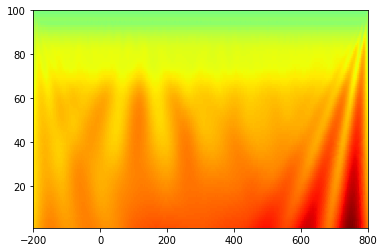

In [4]:
a=0;count=0;evk_ind40=evk_ind66=np.zeros((100, 500))
sub=range(1,51)
Ev=[1,5];#event number
for k in range(0,len(sub)):
      if k!=15:
        for j in range(0,len(Ev)):
            pnh=dirpath+'S'+str(sub[k])+'/'+'Trig_'+str(Ev[j])+'/'
            dpin=pnh
            print dpin
            from os import walk
            from os.path import isfile, join
            f = []
            for (dpin, dirnames, filenames) in walk(dpin):
                f.extend(join(dpin, x) for x in filenames if x.endswith(".csv"))
                break
            for i in range(0,len(f)):
                dd=pd.read_csv(f[i])
                df1=dd
                tmp = df1.copy()
                tmp = tmp.drop(columns=['cc1'] )
                ## base line correction
                orgd=np.asmatrix(tmp)
                blm=np.mean(tmp.iloc[:,0:100],axis=1)
                bsm=np.asmatrix(blm).T
                ablc=orgd-bsm
                df22=np.asarray(ablc)
                df22
                cwtmatr40, freqs = pywt.cwt(df22[40], widths, 'morl')
                evk_ind40=evk_ind40+abs(cwtmatr40)
                cwtmatr66, freqs = pywt.cwt(df22[66], widths, 'morl')
                evk_ind66=evk_ind66+abs(cwtmatr66)
                dd1=dd.drop(dd.columns[0],axis=1)
                a=a+dd1
                count=count+1
dftk15=pd.DataFrame(a/count)
cwtmatr_evk40, freqs40 = pywt.cwt(dftk15.iloc[40,:], widths, 'morl')
ind_res40=(evk_ind40/count)-cwtmatr_evk40
cwtmatr_evk66, freqs66 = pywt.cwt(dftk15.iloc[66,:], widths, 'morl')
ind_res66=(evk_ind66/count)-cwtmatr_evk66
plt.imshow(cwtmatr_evk40, extent=[-200, 800, 1, 100], cmap='jet', aspect='auto',vmax=abs(cwtmatr_evk40).max(), vmin=-abs(cwtmatr_evk40).max()) # doctest:
plt.imshow(ind_res40, extent=[-200, 800, 1, 100], cmap='jet', aspect='auto',vmax=abs(ind_res40).max(), vmin=-abs(ind_res40).max()) # doctest:
plt.show()

In [5]:
# cwtmatr.shape
# cwtmatr_evk, freqs = pywt.cwt(dftk15.iloc[66,:], widths, 'morl')
# im=plt.imshow(cwtmatr_evk, extent=[-200, 800, 1, 100], cmap='jet', aspect='auto',vmax=abs(cwtmatr_evk).max(), vmin=-abs(cwtmatr_evk).max()) # doctest:

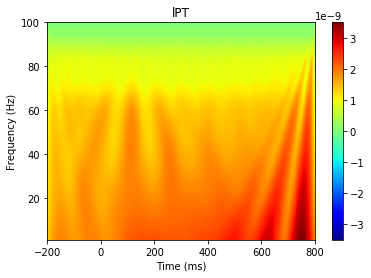

In [5]:
# plt.imshow(cwtmatr_evk40, extent=[-200, 800, 1, 100], cmap='jet', aspect='auto',vmax=abs(cwtmatr_evk40).max(), vmin=-abs(cwtmatr_evk40).max()) # doctest:
im=plt.imshow(ind_res40, extent=[-200, 800, 1, 100], cmap='jet', aspect='auto',vmax=abs(ind_res40).max(), vmin=-abs(ind_res40).max()) # doctest:
plt.title('lPT')
plt.xlabel('Time (ms)')
plt.ylabel('Frequency (Hz)')
# plt.clim(-3e-10, 3e-10)
plt.colorbar(im)
plt.show() # doctest: +SKIP
plt.show()

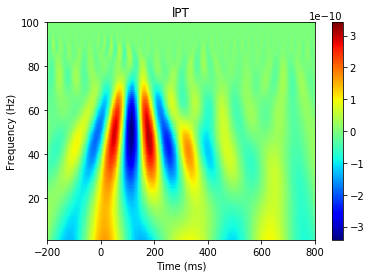

In [6]:
im=plt.imshow(cwtmatr_evk40, extent=[-200, 800, 1, 100], cmap='jet', aspect='auto',vmax=abs(cwtmatr_evk40).max(), vmin=-abs(cwtmatr_evk40).max()) # doctest:
# plt.imshow(ind_res40, extent=[-200, 800, 1, 100], cmap='jet', aspect='auto',vmax=abs(ind_res40).max(), vmin=-abs(ind_res40).max()) # doctest:
plt.title('lPT')
plt.xlabel('Time (ms)')
plt.ylabel('Frequency (Hz)')
# plt.clim(-3e-10, 3e-10)
plt.colorbar(im)
plt.show() # doctest: +SKIP
plt.show()

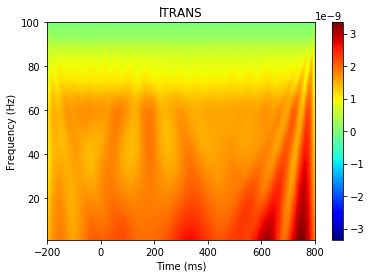

In [7]:
# plt.imshow(cwtmatr_evk40, extent=[-200, 800, 1, 100], cmap='jet', aspect='auto',vmax=abs(cwtmatr_evk40).max(), vmin=-abs(cwtmatr_evk40).max()) # doctest:
im=plt.imshow(ind_res66, extent=[-200, 800, 1, 100], cmap='jet', aspect='auto',vmax=abs(ind_res66).max(), vmin=-abs(ind_res66).max()) # doctest:
plt.title('lTRANS')
plt.xlabel('Time (ms)')
plt.ylabel('Frequency (Hz)')
# plt.clim(-3e-9, 3e-9)
plt.colorbar(im)
plt.show() # doctest: +SKIP
plt.show()

## Tk15 legend

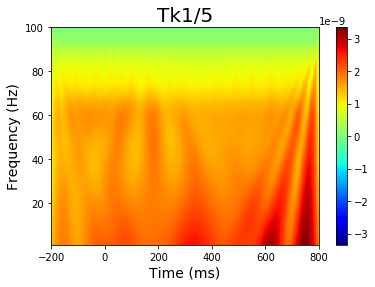

In [23]:
axis_font = {'fontname':'Arial', 'size':'14'}
# plt.imshow(cwtmatr_evk40, extent=[-200, 800, 1, 100], cmap='jet', aspect='auto',vmax=abs(cwtmatr_evk40).max(), vmin=-abs(cwtmatr_evk40).max()) # doctest:
im=plt.imshow(ind_res66, extent=[-200, 800, 1, 100], cmap='jet', aspect='auto',vmax=abs(ind_res66).max(), vmin=-abs(ind_res66).max()) # doctest:
plt.title('Tk1/5',fontsize=20)
plt.xlabel('Time (ms)',**axis_font)
plt.ylabel('Frequency (Hz)',**axis_font)
# plt.clim(-3e-9, 3e-9)
plt.colorbar(im)
plt.show() # doctest: +SKIP
plt.show()

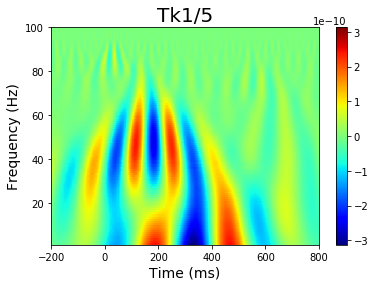

In [21]:
axis_font = {'fontname':'Arial', 'size':'14'}
im=plt.imshow(cwtmatr_evk66, extent=[-200, 800, 1, 100], cmap='jet', aspect='auto',vmax=abs(cwtmatr_evk66).max(), vmin=-abs(cwtmatr_evk66).max()) # doctest:
# plt.imshow(ind_res40, extent=[-200, 800, 1, 100], cmap='jet', aspect='auto',vmax=abs(ind_res40).max(), vmin=-abs(ind_res40).max()) # doctest:
plt.title('Tk1/5',fontsize=20)
plt.xlabel('Time (ms)',**axis_font)
plt.ylabel('Frequency (Hz)',**axis_font)
# plt.clim(-3e-10, 3e-10)
plt.colorbar(im)
plt.show() # doctest: +SKIP
plt.show()

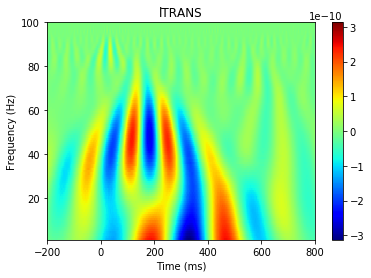

In [9]:
im=plt.imshow(cwtmatr_evk66, extent=[-200, 800, 1, 100], cmap='jet', aspect='auto',vmax=abs(cwtmatr_evk66).max(), vmin=-abs(cwtmatr_evk66).max()) # doctest:
# plt.imshow(ind_res40, extent=[-200, 800, 1, 100], cmap='jet', aspect='auto',vmax=abs(ind_res40).max(), vmin=-abs(ind_res40).max()) # doctest:
plt.title('lTRANS')
plt.xlabel('Time (ms)')
plt.ylabel('Frequency (Hz)')
# plt.clim(-3e-10, 3e-10)
plt.colorbar(im)
plt.show() # doctest: +SKIP
plt.show()

In [10]:
# len(a.iloc[44,:].values)
# dnhc*300==a

In [11]:
# plt.plot(df22)
# plt.show()

In [24]:
# widths = np.arange(1,100)
# cwtmatr, freqs = pywt.cwt(df22[66], widths, 'morl')
# im=plt.imshow(cwtmatr, extent=[-200, 800, 1, 100], cmap='jet', aspect='auto',vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max()) # doctest:
# # plt.title('lTRANS')
# # plt.xlabel('Time (ms)')
# # plt.ylabel('Frequency (Hz)')
# # # plt.clim(-3e-10, 3e-10)
# # plt.colorbar(im)
# # plt.show() # doctest: +SKIP

In [33]:
dt =1/500.0  # 100 Hz sample
frequencies = pywt.scale2frequency('morl', np.arange(1,101))/dt
thein=np.logical_and(frequencies>=5, frequencies<=8)
theindex=np.where(thein)
alpin=np.logical_and(frequencies>=9, frequencies<=13)
alpindex=np.where(alpin)
betin=np.logical_and(frequencies>=14, frequencies<=29)
betindex=np.where(betin)
gamin=np.logical_and(frequencies>=30, frequencies<=100)
gamindex=np.where(gamin)

## Extarcting different frequency band signals

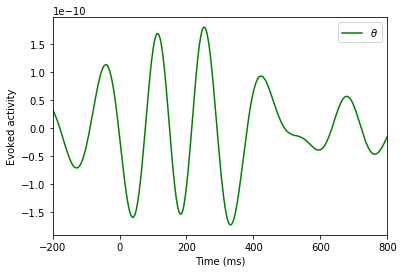

In [117]:
t=np.linspace(-200, 800,500)
theta=np.mean(cwtmatr_evk66[theindex,:][0],axis=0)
plt.plot(t,theta, color='green')
plt.legend([r'$\theta$'])
plt.xlabel('Time (ms)')
plt.ylabel('Evoked activity')
plt.xlim([-200, 800])
plt.show()

In [101]:
len(t)

2

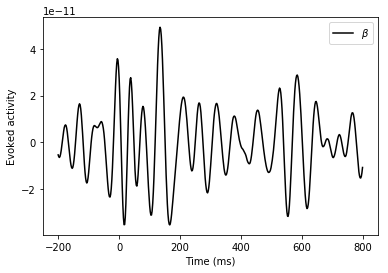

In [104]:
bet=np.mean(cwtmatr_evk66[betindex,:][0],axis=0)
plt.plot(t,bet, color='k')
plt.legend([r'$\beta$'])
plt.xlabel('Time (ms)')
plt.ylabel('Evoked activity')
plt.show()

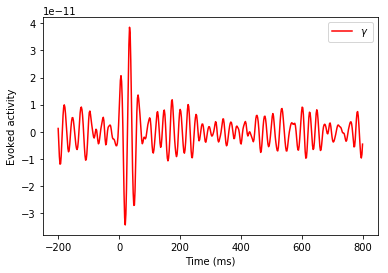

In [105]:
gam=np.mean(cwtmatr_evk66[gamindex,:][0],axis=0)
plt.plot(t,gam, color='r')
plt.legend([r'$\gamma$'])
plt.xlabel('Time (ms)')
plt.ylabel('Evoked activity')
plt.show()

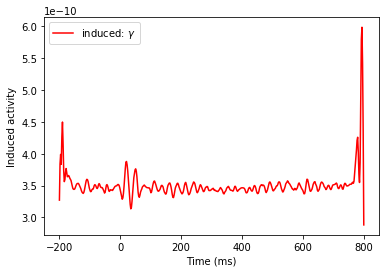

In [109]:
ind_res66
gam=np.mean(ind_res66[gamindex,:][0],axis=0)
plt.plot(t,gam, color='r')
plt.legend(['induced: ' r'$\gamma$'])
plt.xlabel('Time (ms)')
plt.ylabel('Induced activity')
plt.show()

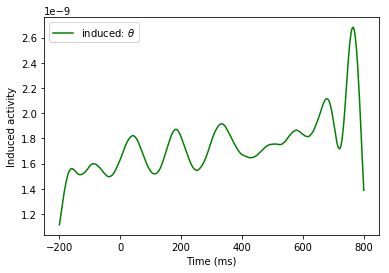

In [119]:
thetain=np.mean(ind_res66[theindex,:][0],axis=0)
plt.plot(t,thetain, color='green')
plt.legend([ 'induced: ' r'$\theta$'])
plt.xlabel('Time (ms)')
plt.ylabel('Induced activity')
plt.show()

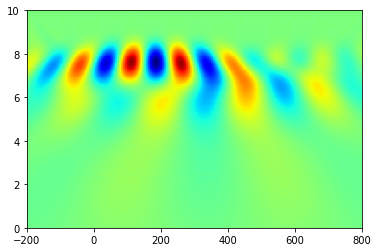

In [144]:
widths_t = np.arange(1,250)
cwtmatr_evk4, freqs4 = pywt.cwt(theta, widths_t, 'morl')
# ind_res40=(evk_ind40/count)-cwtmatr_evk40
# cwtmatr_evk66, freqs66 = pywt.cwt(dftk15.iloc[66,:], widths, 'morl')
# ind_res66=(evk_ind66/count)-cwtmatr_evk66
plt.imshow(cwtmatr_evk4, extent=[-200, 800, 0, 10], cmap='jet', aspect='auto',vmax=abs(cwtmatr_evk4).max(), vmin=-abs(cwtmatr_evk4).max()) # doctest:
# plt.imshow(ind_res40, extent=[-200, 800, 1, 100], cmap='jet', aspect='auto',vmax=abs(ind_res40).max(), vmin=-abs(ind_res40).max()) # doctest:
plt.show()
# im=plt.imshow(cwtmatr_evk66, extent=[-200, 800, 1, 100], cmap='jet', aspect='auto',vmax=abs(cwtmatr_evk66).max(), vmin=-abs(cwtmatr_evk66).max()) # doctest:
# # plt.imshow(ind_res40, extent=[-200, 800, 1, 100], cmap='jet', aspect='auto',vmax=abs(ind_res40).max(), vmin=-abs(ind_res40).max()) # doctest:
# plt.title('lTRANS')
# plt.xlabel('Time (ms)')
# plt.ylabel('Frequency (Hz)')
# # plt.clim(-3e-10, 3e-10)
# plt.colorbar(im)
# plt.show() # doctest: +SKIP
# plt.show()

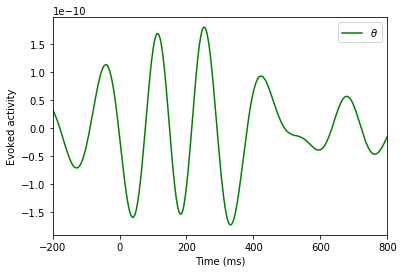

In [123]:
t=np.linspace(-200, 800,500)
theta=np.mean(cwtmatr_evk66[theindex,:][0],axis=0)
plt.plot(t,theta, color='green')
plt.legend([r'$\theta$'])
plt.xlabel('Time (ms)')
plt.ylabel('Evoked activity')
plt.xlim([-200, 800])
plt.show()

In [145]:
cwtmatr_evk66.shape

(100, 500)